In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:

pd.set_option('mode.chained_assignment', None) # Warnin 방지용
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from matplotlib import font_manager, rc

%matplotlib inline
#sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(12,9)

path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [3]:
import pandas as pd
factor = pd.read_csv('data2/dw_fire_fighting.csv', encoding='ansi')
factor.head()

,fire_date,city,district,district_code,fire_type,type_code,fire_source,fire_source_code,fire_factor,fire_factor_code,casualties,dead,injury,property_damage,place,place_code
0,2019-01,부산광역시,부산진구,D07,"건축,구조물",T05,작동기기,S02,전기적 요인,F05,0,0,0,45,기타,P05
1,2019-01,부산광역시,남구,D04,"건축,구조물",T05,미상,S04,미상,F04,0,0,0,2997,공동주택,P02
2,2019-01,부산광역시,사상구,D09,"건축,구조물",T05,미상,S04,미상,F04,0,0,0,0,단독주택,P07
3,2019-01,부산광역시,강서구,D01,"건축,구조물",T05,"담뱃불, 라이터불",S07,부주의,F01,0,0,0,113,기타,P05
4,2019-01,부산광역시,강서구,D01,"건축,구조물",T05,작동기기,S02,전기적 요인,F05,0,0,0,65,단독주택,P07


In [4]:
# 월 단위
month = []
for m in factor['fire_date']:
    if m not in month:
        month.append(m)
        

# 월 화재건수
monthsum = []
for i in range(len(month)):
    m = factor[factor.fire_date == month[i]]
    ms = m['fire_date'].count()
    monthsum.append(ms)
    
# 월별 화재건수
month_df = pd.DataFrame({
    'fire_date': month,
    'occur_cnt': monthsum
})

month_df

,fire_date,occur_cnt
0,2019-01,260
1,2019-02,150
2,2019-03,198
3,2019-04,202
4,2019-05,214
5,2019-06,176
6,2019-07,210
7,2019-08,201
8,2019-09,197
9,2019-10,186


In [5]:
# 월 피해규모
m_damagesum = []
for i in range(len(month)):
    m = factor[factor.fire_date == month[i]]
    ds = m['property_damage'].sum()
    m_damagesum.append(ds)
    


# 월별 피해규모
month_damage_df = pd.DataFrame({
    'fire_date' : month,
    'property_damage_sum_k' : m_damagesum
})

month_damage_df

,fire_date,property_damage_sum_k
0,2019-01,334585
1,2019-02,644040
2,2019-03,376592
3,2019-04,1052403
4,2019-05,496221
5,2019-06,150699
6,2019-07,1204643
7,2019-08,281100
8,2019-09,238216
9,2019-10,200350


In [6]:
district = [] # 구
district_code = [] # 구 코드
for c in factor['district']:
    if c not in district:
        district.append(c)
for d in factor['district_code']:
    if d not in district_code:
        district_code.append(d)

district_sum = [] # 구 발생건수
for i in range(len(district)):
    d = factor[factor.district == district[i]]   
    ds = d['district'].count()
    district_sum.append(ds)
    
# 구 피해규모
d_damage_sum = []
for i in range(len(district)):
    d = factor[factor.district == district[i]]
    ds = d['property_damage'].sum()
    d_damage_sum.append(ds)
    
district_df = pd.DataFrame({
    'district': district,
    'district_code':district_code,
    'occur_cnt' : district_sum
})

d_damage_df = pd.DataFrame({
    'district': district,
    'district_code':district_code,
    'district_property_damage_k': d_damage_sum
})


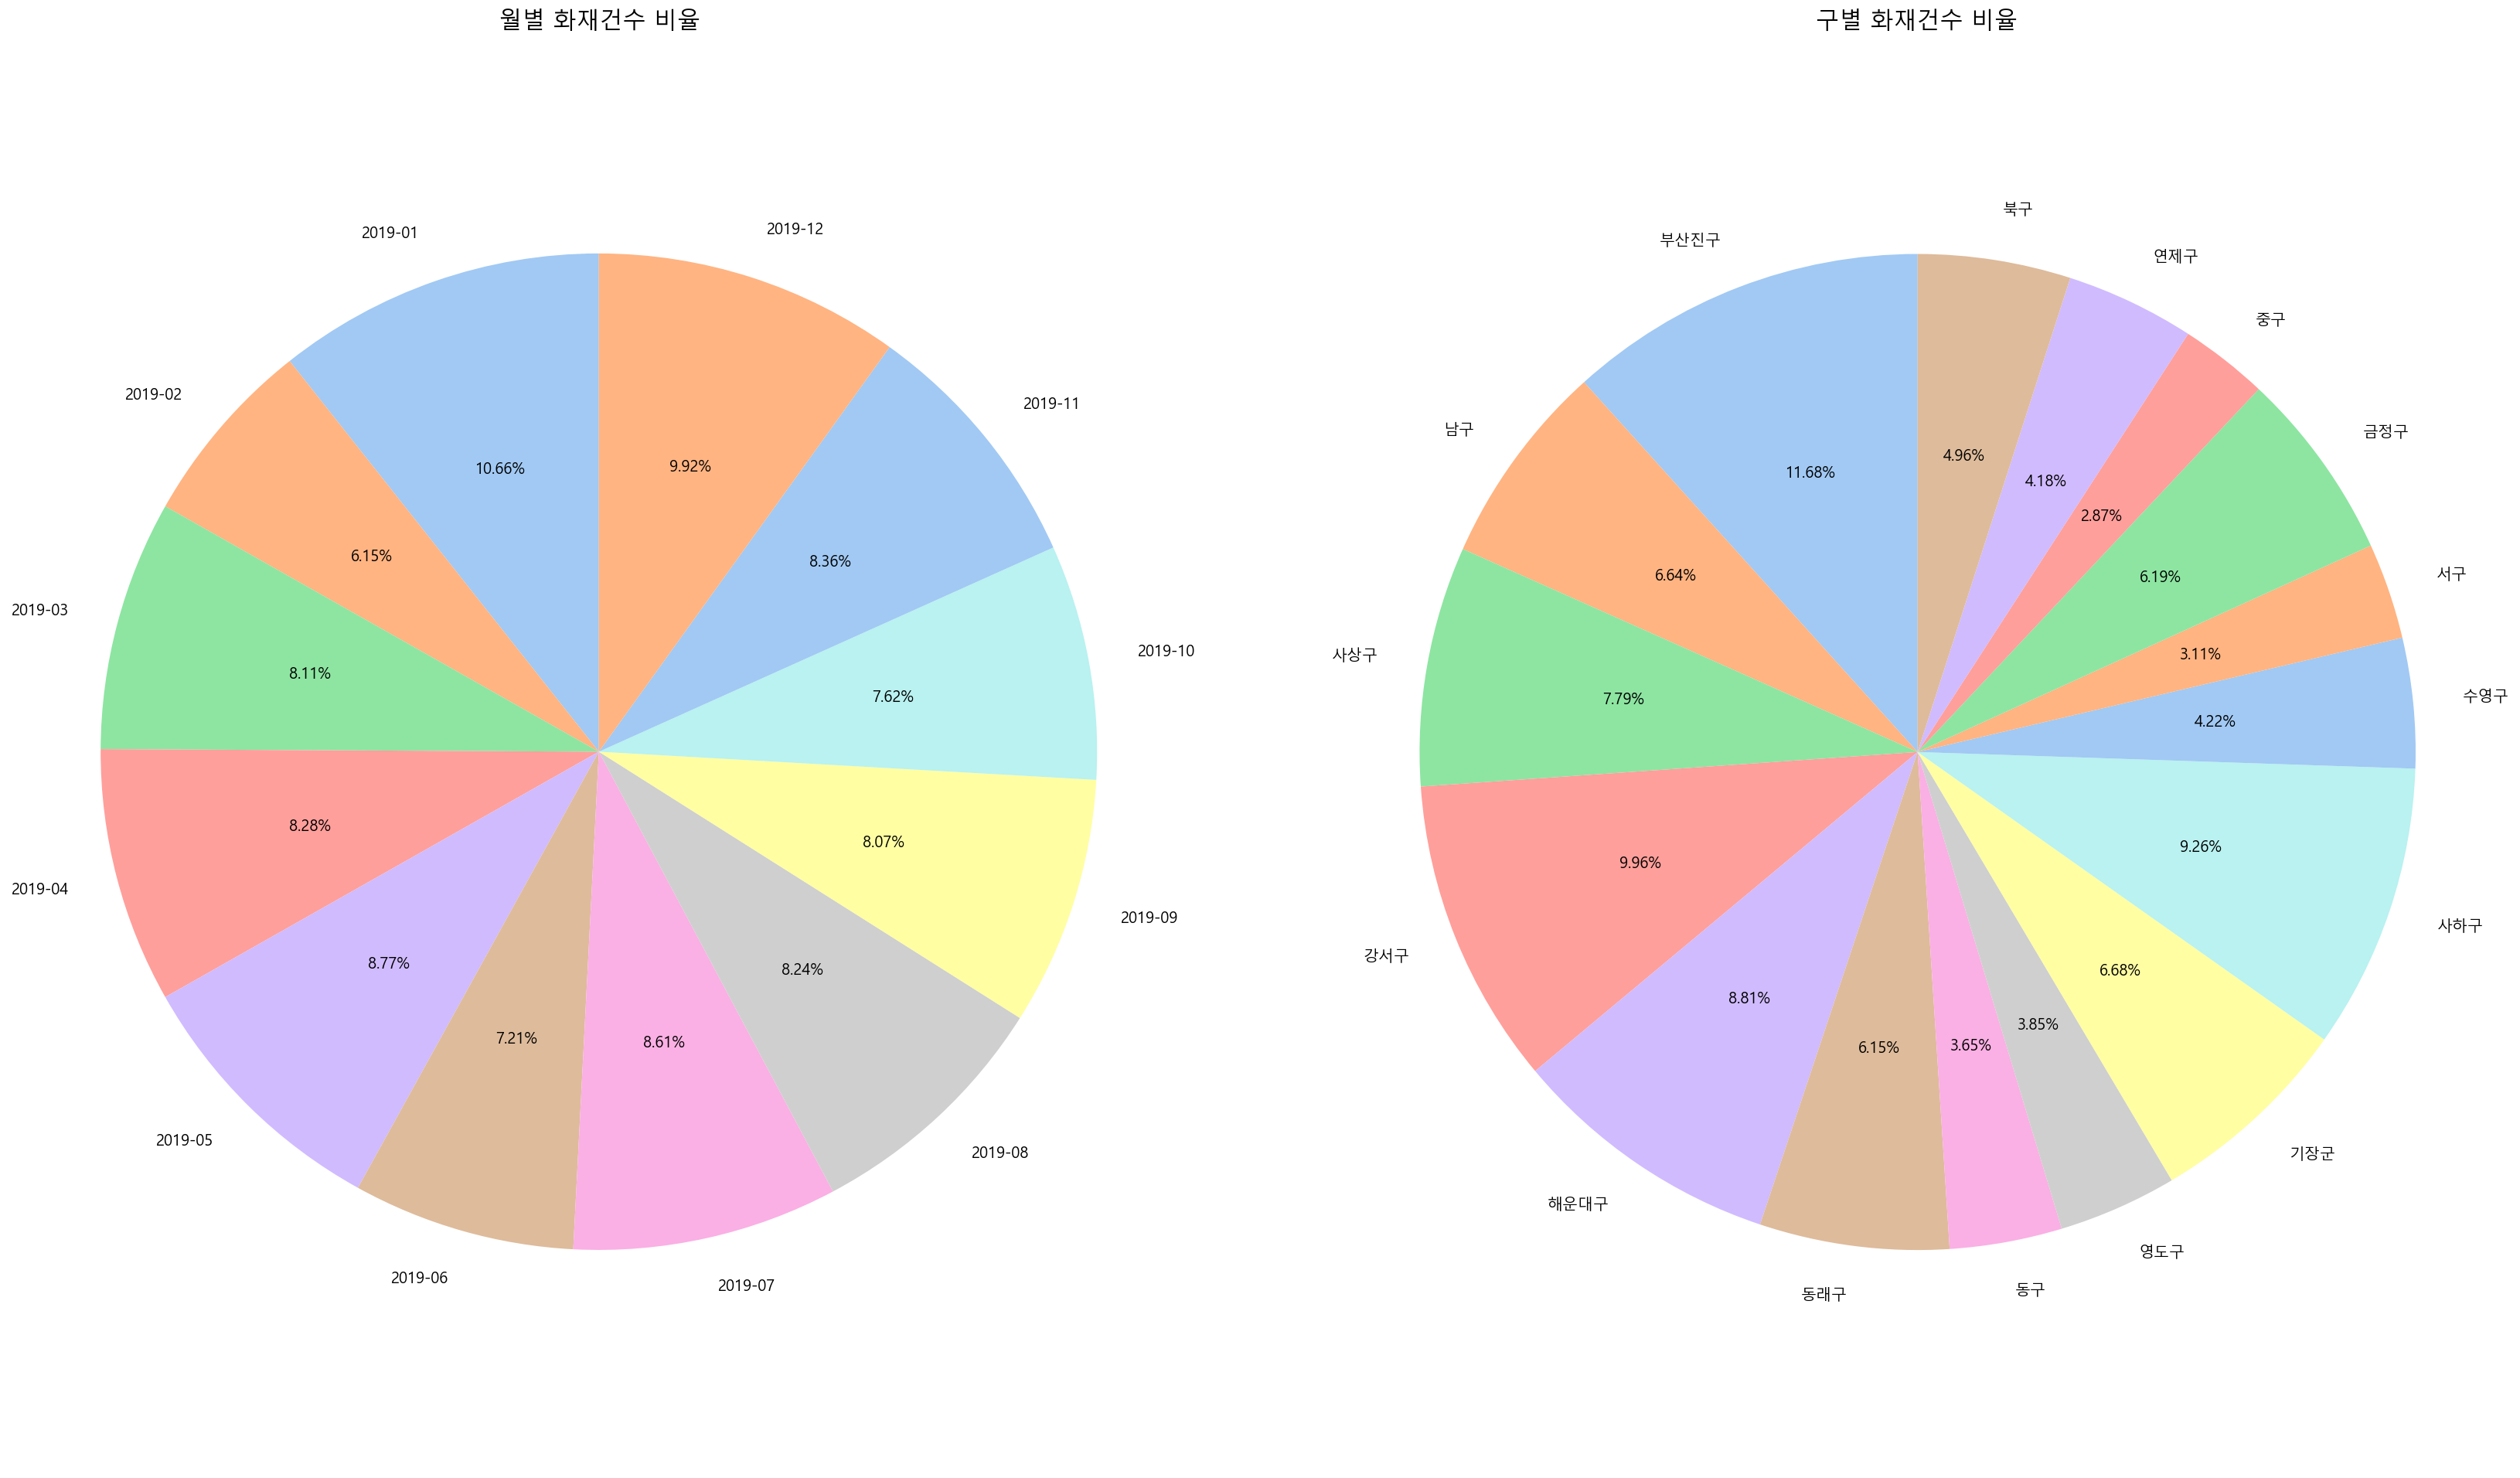

In [7]:
sns.set_palette('pastel')
fig, axes = plt.subplots(1, 2, figsize=(28,17))
axes[0].set_title("월별 화재건수 비율", fontsize=15)
axes[0].pie(monthsum, labels=month, autopct='%.2f%%', startangle=90)
axes[0].axis('equal')
axes[1].set_title("구별 화재건수 비율", fontsize=15)
axes[1].pie(district_sum, labels=district, autopct='%.2f%%', startangle=90)
axes[1].axis('equal')
plt.rc('xtick', labelsize=13)
plt.show()

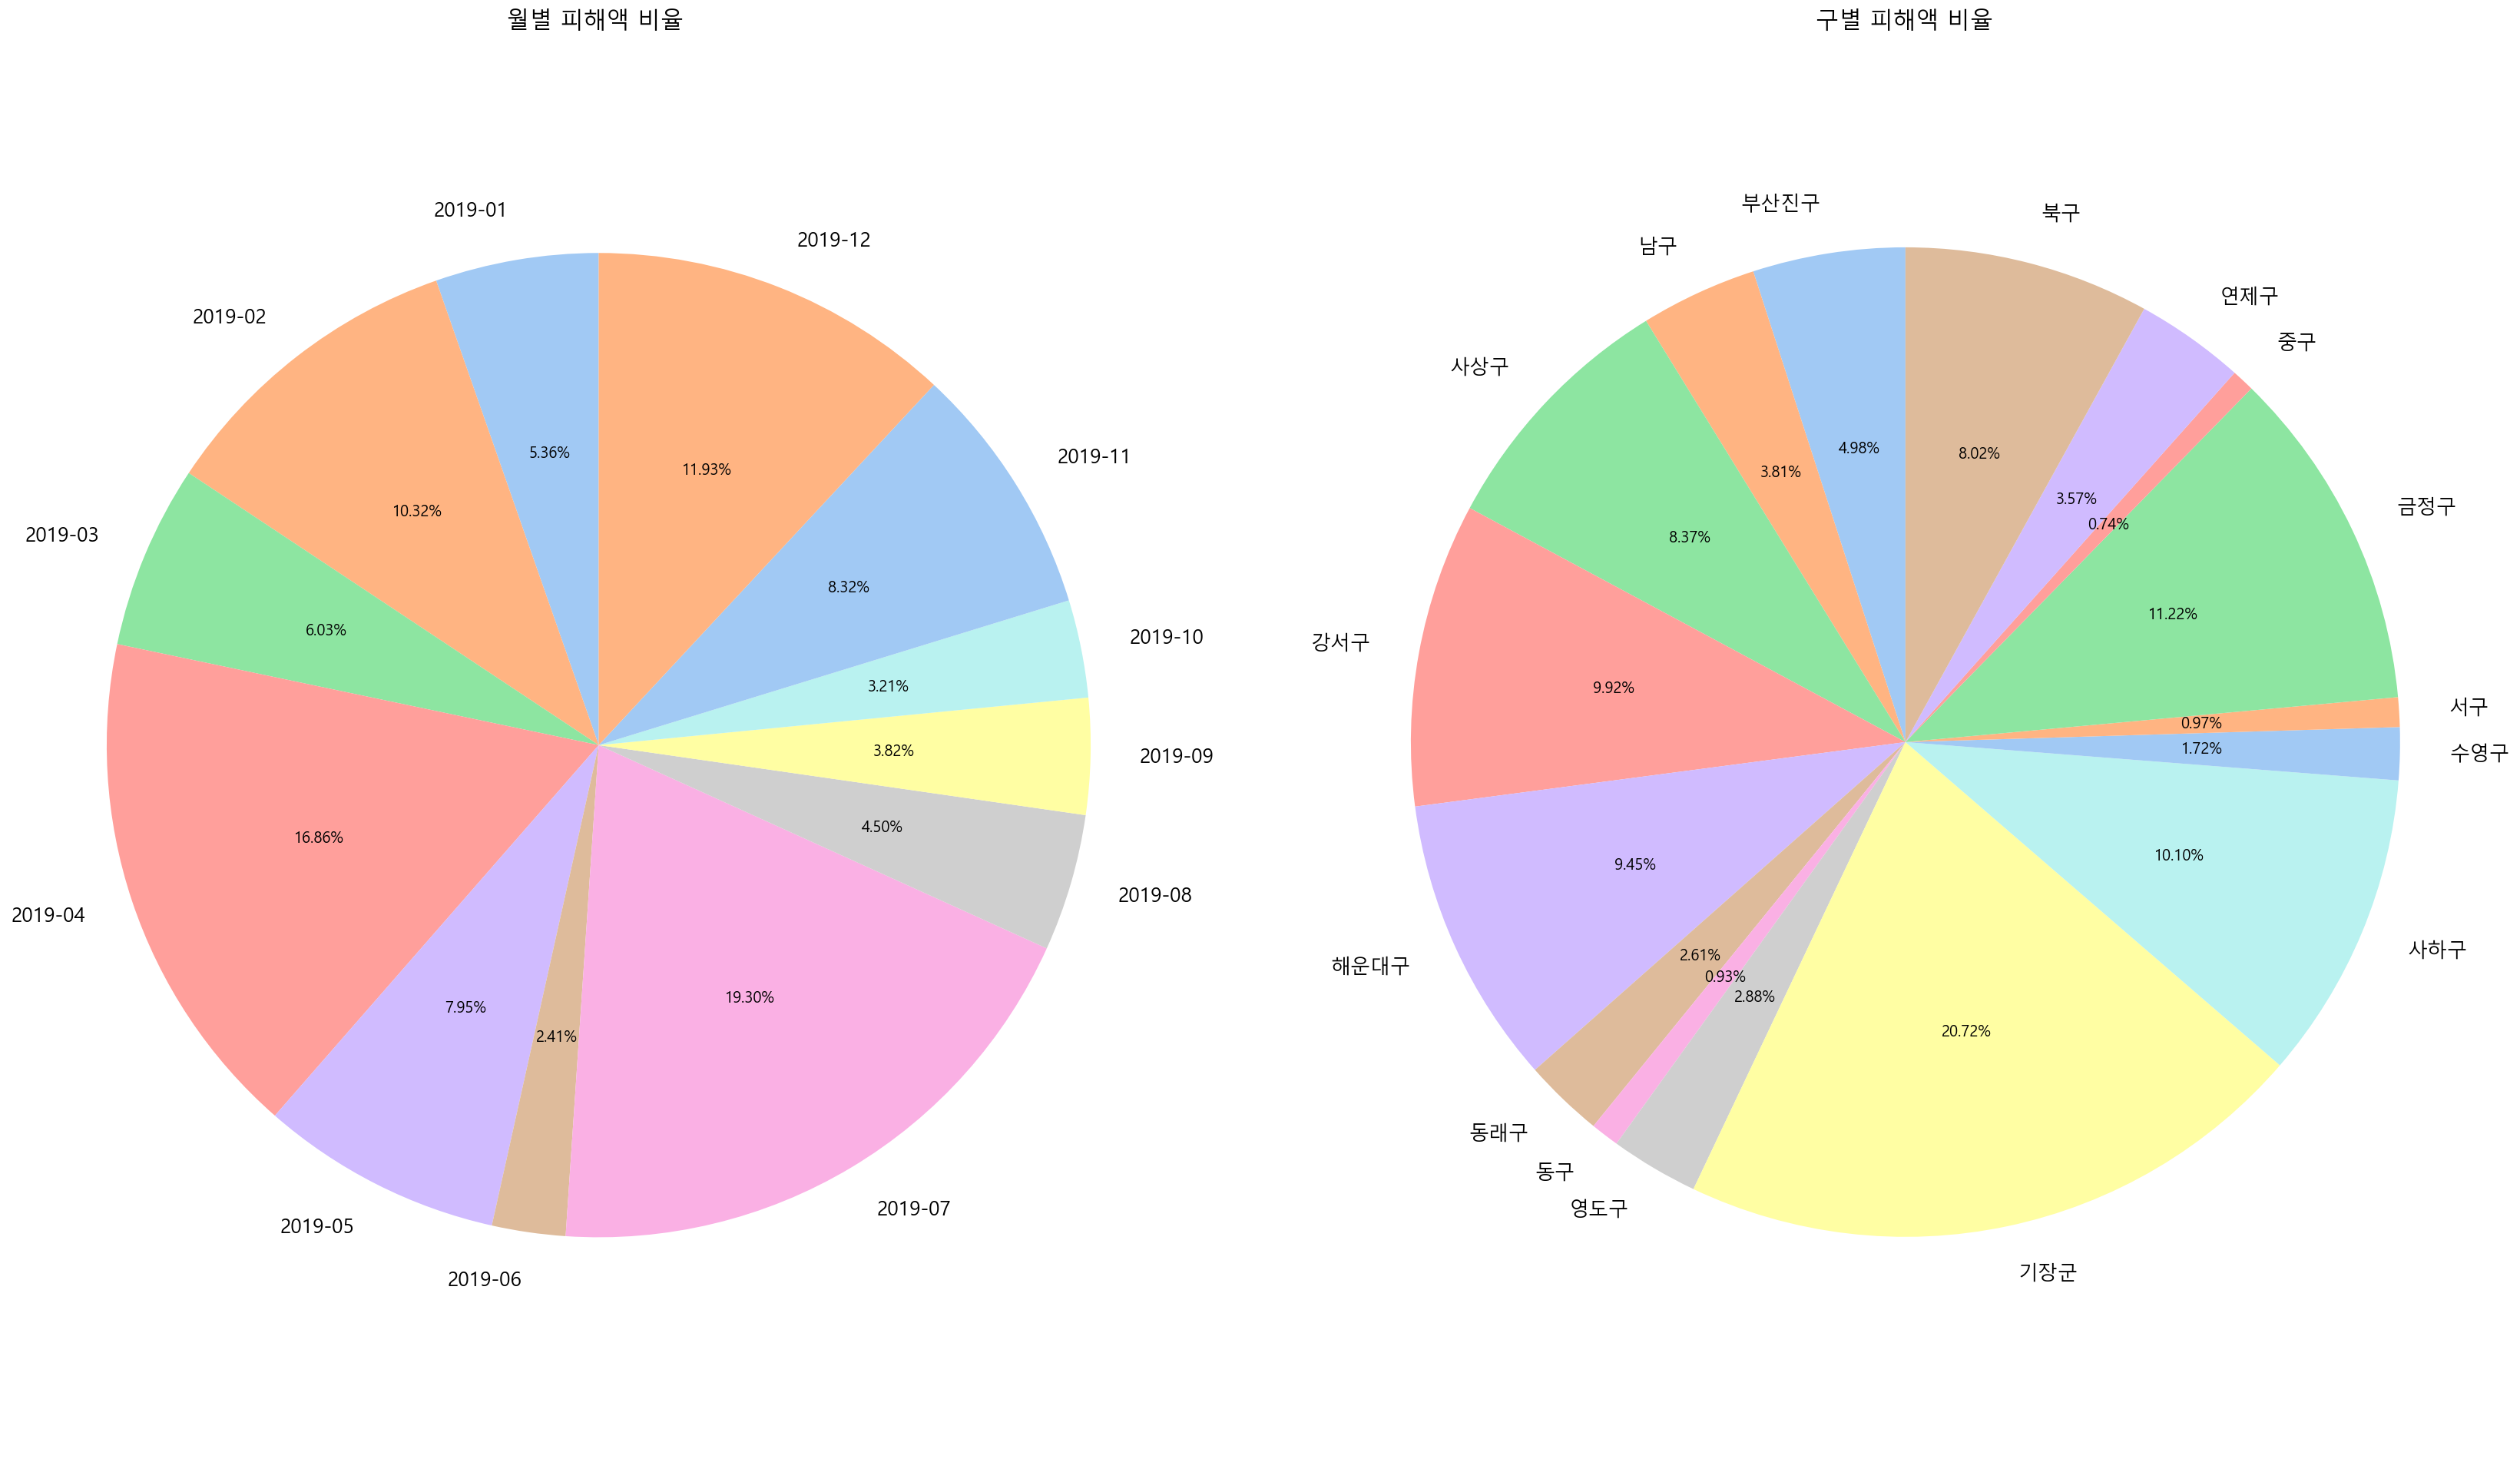

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(28,17))
sns.set_palette('pastel')
axes[0].set_title("월별 피해액 비율", fontsize=15)
axes[0].pie(m_damagesum, labels=month, autopct='%.2f%%', startangle=90)
axes[0].axis('equal')
axes[1].set_title("구별 피해액 비율", fontsize=15)
axes[1].pie(d_damage_sum, labels=district, autopct='%.2f%%', startangle=90)
axes[1].axis('equal')
plt.rc('xtick', labelsize=13)
plt.show()

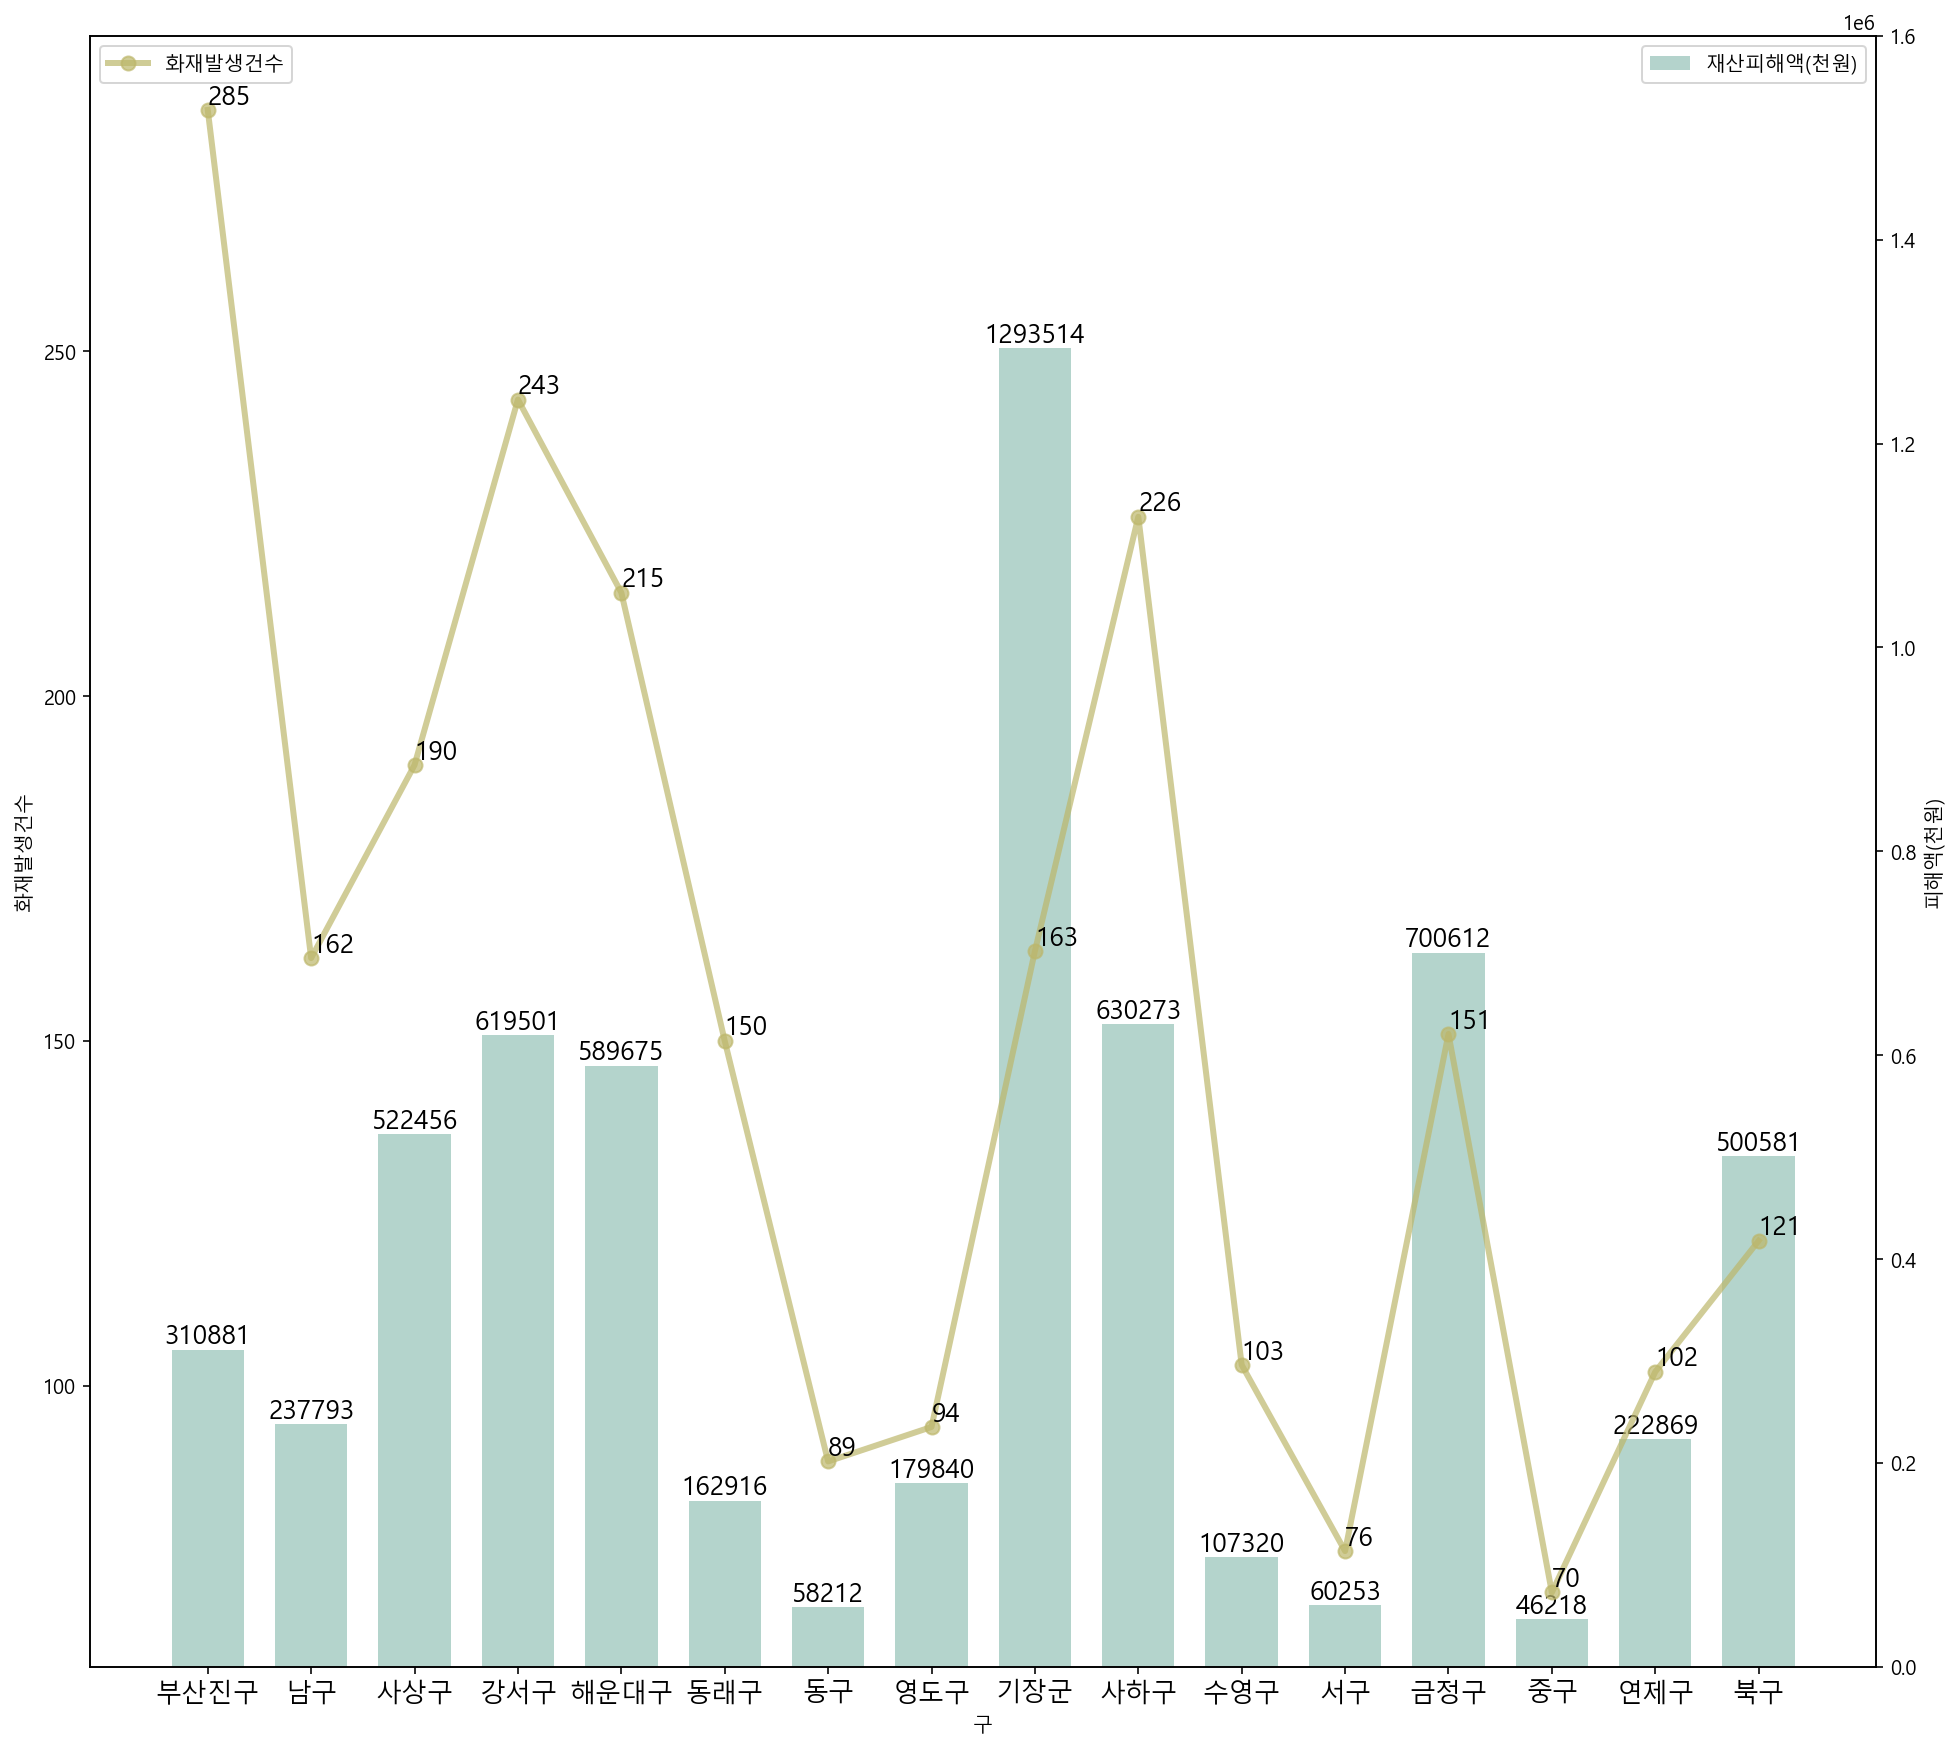

In [9]:
# 구별 화재발생건수 및 재산피해규모 나오는지 확인
fig, ax1 = plt.subplots(figsize=(16,15))
plt.rc('xtick', labelsize=13)
ax1.plot(district, district_df['occur_cnt'], color='darkkhaki', markersize=7, linewidth=3, alpha=0.7, label='화재발생건수', marker='o')
ax1.set_xlabel('구')
ax1.set_ylabel('화재발생건수')
for i, v in enumerate(district):
    plt.text(v, district_df['occur_cnt'][i], str(district_df['occur_cnt'][i]),
            fontsize=13,
            color='black',
            horizontalalignment='left',
            verticalalignment='bottom')
ax2 = ax1.twinx()
ax2.bar(district, d_damage_df['district_property_damage_k'], color='#95C2B7', label='재산피해액(천원)', alpha=0.7, width=0.7) 
ax2.set_ylabel('피해액(천원)')
ax2.set_ylim(0, 1600000)
for i, v in enumerate(district):
    plt.text(v, d_damage_df['district_property_damage_k'][i], str(d_damage_df['district_property_damage_k'][i]),
            fontsize=13,
            color='black',
            horizontalalignment='center',
            verticalalignment='bottom')
    
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
    
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [10]:
# 화재유형
fire_type = []
fire_type_code = []
for t in factor['fire_type']:
    if t not in fire_type:
        fire_type.append(t)
        
for t in factor['type_code']:
    if t not in fire_type_code:
        fire_type_code.append(t)
        
type_sum = []
for t in range(len(fire_type)):
    ft = factor[factor.fire_type == fire_type[t]]
    fts = ft['fire_type'].count()
    type_sum.append(fts)
    
    
# 화재원인       
fire_source = []
fire_source_code = []
for s in factor['fire_source']:
    if s not in fire_source:
        fire_source.append(s)
        
for s in factor['fire_source_code']:
    if s not in fire_source_code:
        fire_source_code.append(s)
        
source_sum = []
for s in range(len(fire_source)):
    fs = factor[factor.fire_source == fire_source[s]]
    fss = fs['fire_source'].count()
    source_sum.append(fss)
    
    
# 화재요인
fire_factor = []
fire_factor_code = []
for f in factor['fire_factor']:
    if f not in fire_factor:
        fire_factor.append(f)
    
for f in factor['fire_factor_code']:
    if f not in fire_factor_code:
        fire_factor_code.append(f)    

factor_sum = []
for f in range(len(fire_factor)):
    ff = factor[factor.fire_factor == fire_factor[f]]
    ffs = ff['fire_factor'].count()
    factor_sum.append(ffs)
    
    
type_df = pd.DataFrame({
    'fire_type':fire_type,
    'fire_type_code':fire_type_code,
    'type_sum':type_sum
})

source_df = pd.DataFrame({
    'fire_source':fire_source,
    'fire_source_code':fire_source_code,
    'source_sum':source_sum
})

factor_df = pd.DataFrame({
    'fire_factor':fire_factor,
    'fire_factor_code':fire_factor_code,
    'factor_sum':factor_sum
})

In [11]:
# 화재장소
fire_place = []
fire_place_code = []
for p in factor['place']:
    if p not in fire_place:
        fire_place.append(p)
for p in factor['place_code']:
    if p not in fire_place_code:
        fire_place_code.append(p)

# 화재장소 화재건수
fire_place_sum = []
for p in range(len(fire_place)):
    pp = factor[factor.place == fire_place[p]]
    pps = pp['place'].count()
    fire_place_sum.append(pps)
    
# 화재장소 피해액
fire_place_damage_sum = []
for p in range(len(fire_place)):
    pp = factor[factor.place == fire_place[p]]
    pps = pp['property_damage'].sum()
    fire_place_damage_sum.append(pps)
    
place_df = pd.DataFrame({
    'fire_place':fire_place,
    'fire_place_code':fire_place_code,
    'fire_place_sum':fire_place_sum,
    'fire_place_damage_sum':fire_place_damage_sum
})
 
# 장소이름
def place_percent(place):
    place_num = 0
    place_damage_num = 0
    place_sum = 0
    place_damage_sum = 0
    for i in range(len(fire_place)):
        if place_df['fire_place'][i] != place:
            place_sum += place_df['fire_place_sum'][i]
            place_damage_sum += place_df['fire_place_damage_sum'][i]
        else:
            place_num += place_df['fire_place_sum'][i]
            place_damage_num += place_df['fire_place_damage_sum'][i]
            
    print(place_sum, place_num, place_damage_sum, place_damage_num)
    
    place_sn = [place_sum, place_num]
    place_sn_damage = [place_damage_sum, place_damage_num]
    place_sn_name = ['전체', place]
            
    wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5} 
    pie_colors = ['#95C2B7', 'teal']
    
    fig, axes = plt.subplots(1, 2, figsize=(28,17))
    plt.rc('font', size=30)
    plt.rc('xtick', labelsize=20)
    sns.set_palette('pastel')
    axes[0].set_title("%s 건수 비율"%(place), fontsize=30)
    axes[0].pie(place_sn, labels=place_sn_name, autopct='%.2f%%', startangle=90, wedgeprops=wedgeprops, colors=pie_colors)
    axes[0].axis('equal')
    axes[1].set_title("%s 피해액 비율"%(place), fontsize=30)
    axes[1].pie(place_sn_damage, labels=place_sn_name, autopct='%.2f%%', startangle=90, wedgeprops=wedgeprops, colors=pie_colors)
    axes[1].axis('equal')
    plt.show()
    
# 장소코드
def place_percent_code(place_code):
    place_num = 0
    place_damage_num = 0
    place_sum = 0
    place_damage_sum = 0
    for i in range(len(fire_place_code)):
        if place_df['fire_place_code'][i] != place_code:
            place_sum += place_df['fire_place_sum'][i]
            place_damage_sum += place_df['fire_place_damage_sum'][i]
        else:
            place_num += place_df['fire_place_sum'][i]
            place_damage_num += place_df['fire_place_damage_sum'][i]
            place_name = place_df['fire_place'][i]
            
    print(place_sum, place_num, place_damage_sum, place_damage_num, place_name)
    
    place_sn = [place_sum, place_num]
    place_sn_damage = [place_damage_sum, place_damage_num]
    place_sn_name = ['전체', place_name]
            
    wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5}  
    pie_colors = ['#95C2B7', 'teal']
    
    fig, axes = plt.subplots(1, 2, figsize=(28,17))
    plt.rc('font', size=20)
    plt.rc('xtick', labelsize=20)
    sns.set_palette('pastel')
    axes[0].set_title("%s 건수 비율"%(place_name), fontsize=15)
    axes[0].pie(place_sn, labels=place_sn_name, autopct='%.2f%%', startangle=90, wedgeprops=wedgeprops, colors=pie_colors)
    axes[0].axis('equal')
    axes[1].set_title("%s 피해액 비율"%(place_name), fontsize=15)
    axes[1].pie(place_sn_damage, labels=place_sn_name, autopct='%.2f%%', startangle=90, wedgeprops=wedgeprops, colors=pie_colors)
    axes[1].axis('equal')
    plt.show()
    
place_df

,fire_place,fire_place_code,fire_place_sum,fire_place_damage_sum
0,기타,P05,564,741068
1,공동주택,P02,501,530145
2,단독주택,P07,299,327930
3,제2종근린생활시설,P17,314,603574
4,운수시설,P11,29,391291
5,자동차관련시설,P15,210,487252
6,공장시설,P03,150,1979243
7,위락시설,P12,25,20925
8,제1종근린생활시설,P16,172,599704
9,종교시설,P18,13,34161


2370 70 5964169 278745


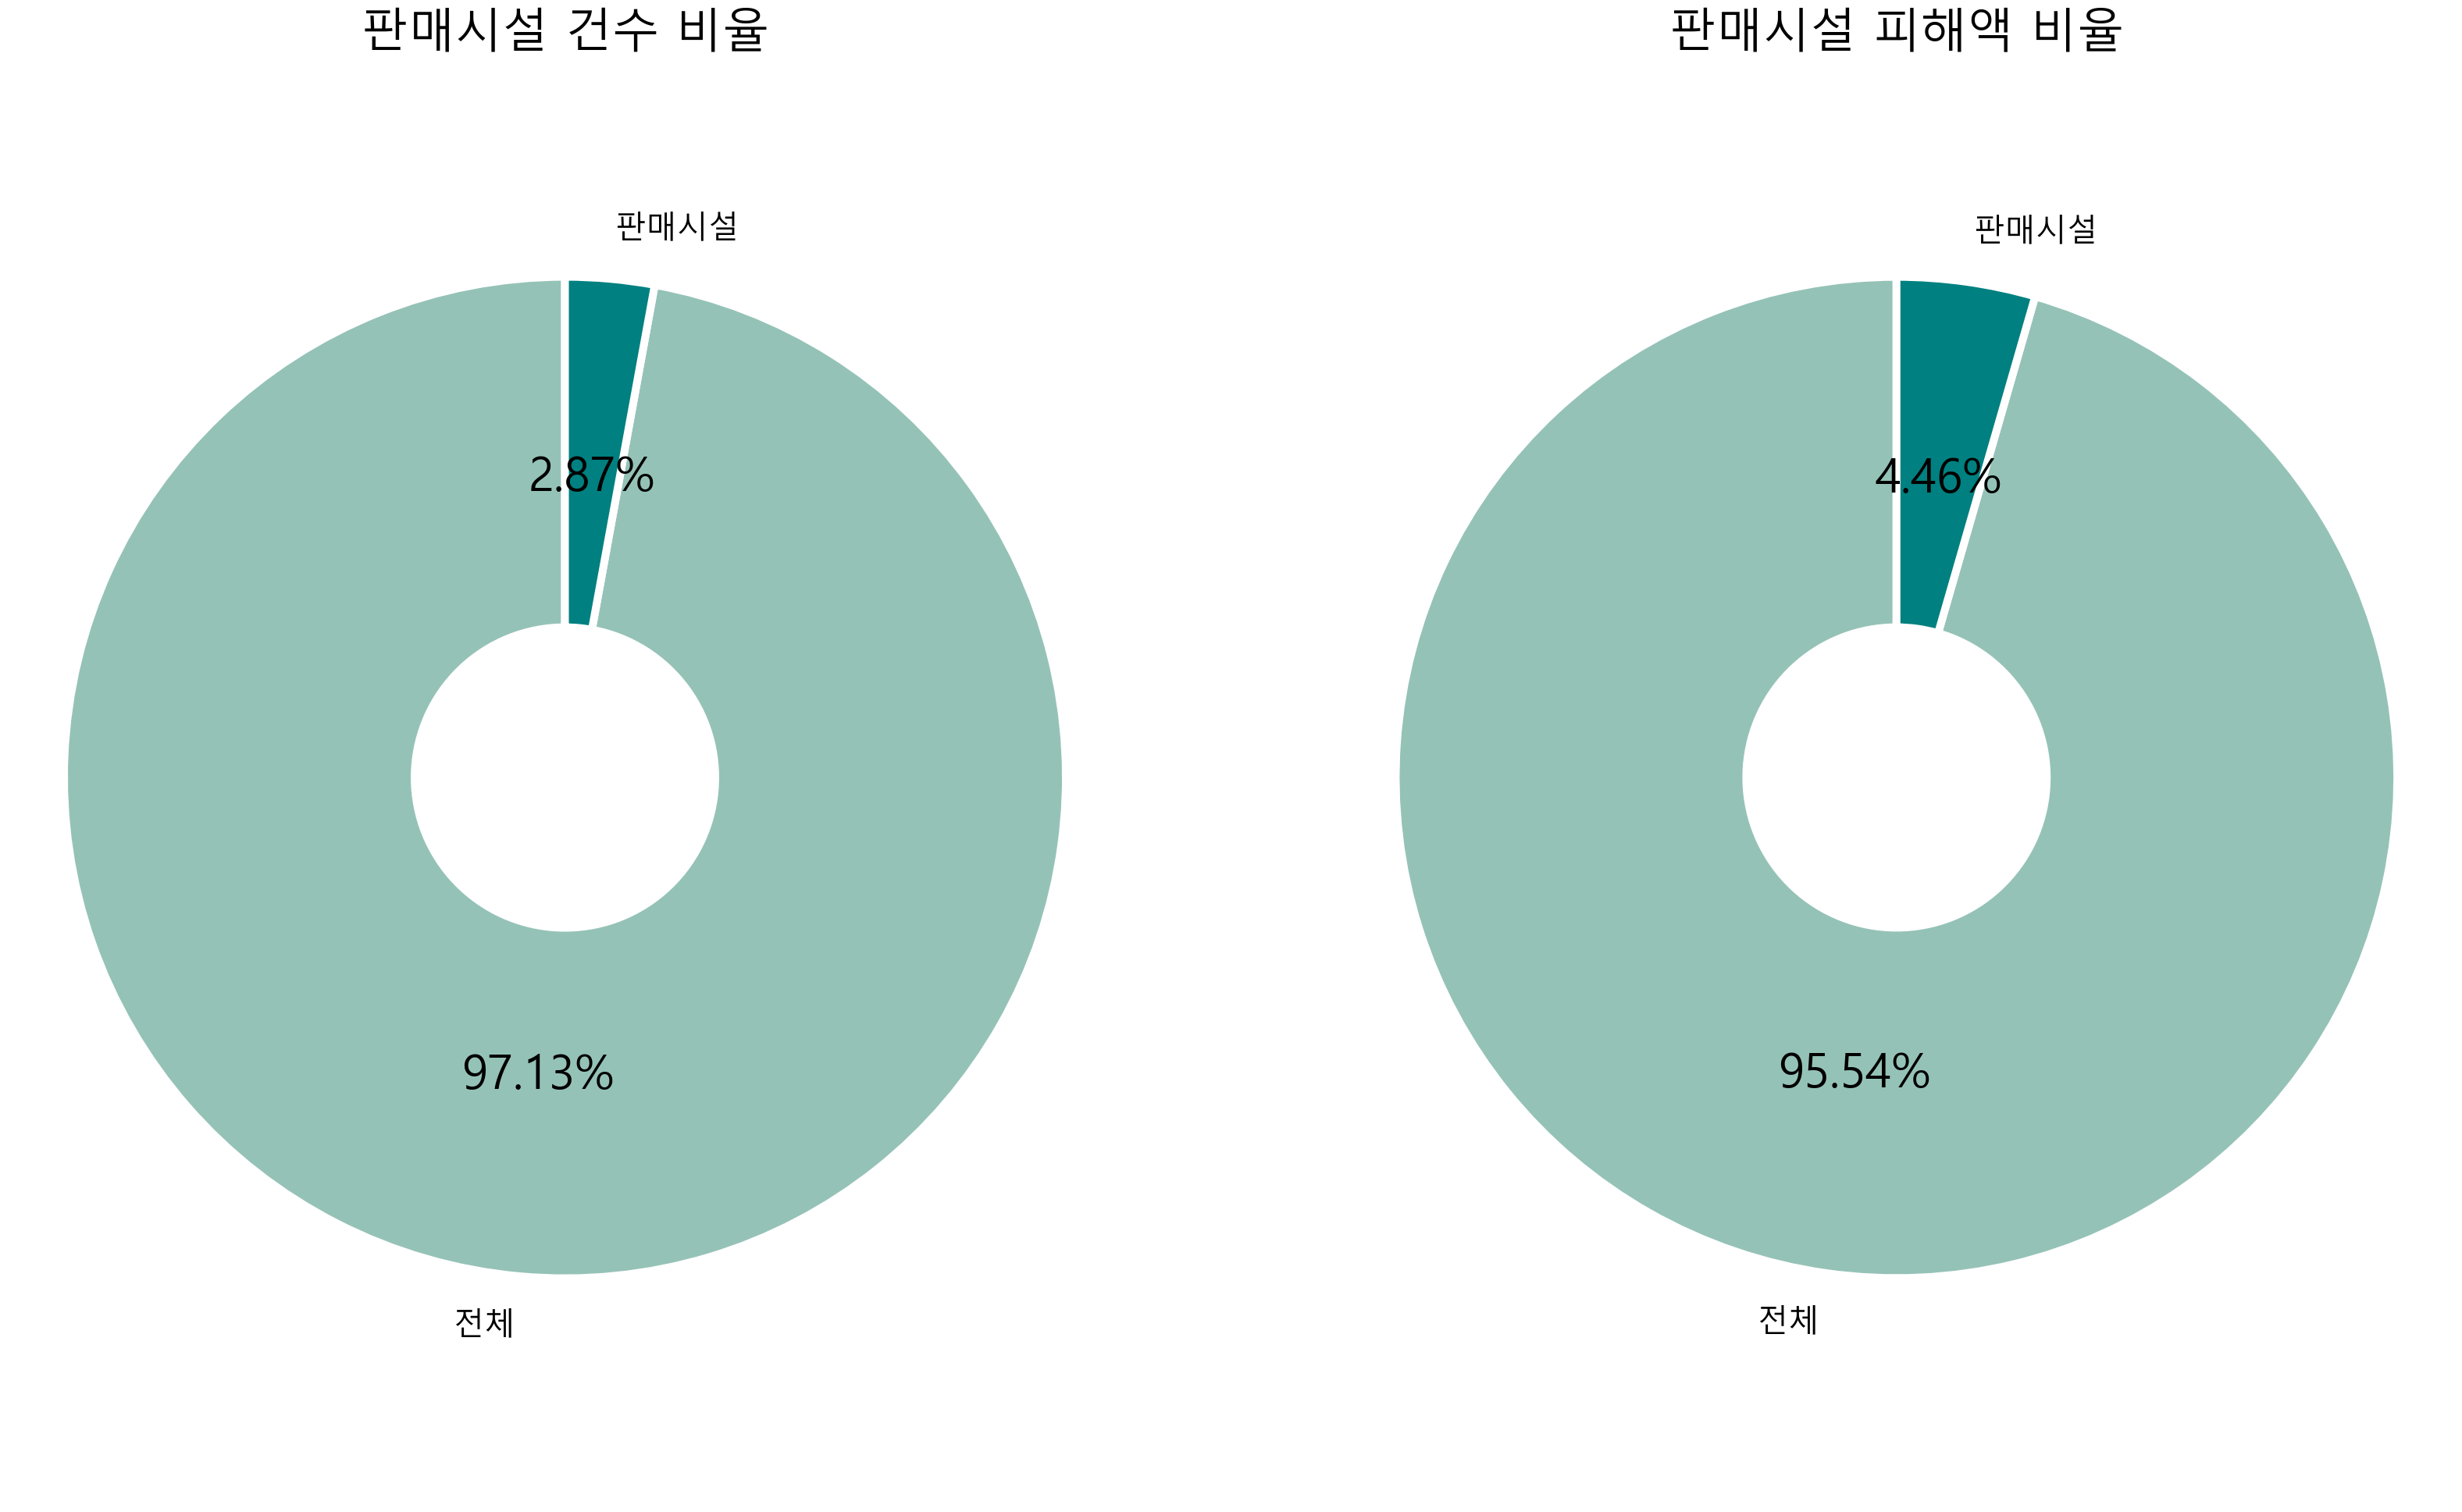

In [12]:
place_percent('판매시설')

2290 150 4263671 1979243 공장시설


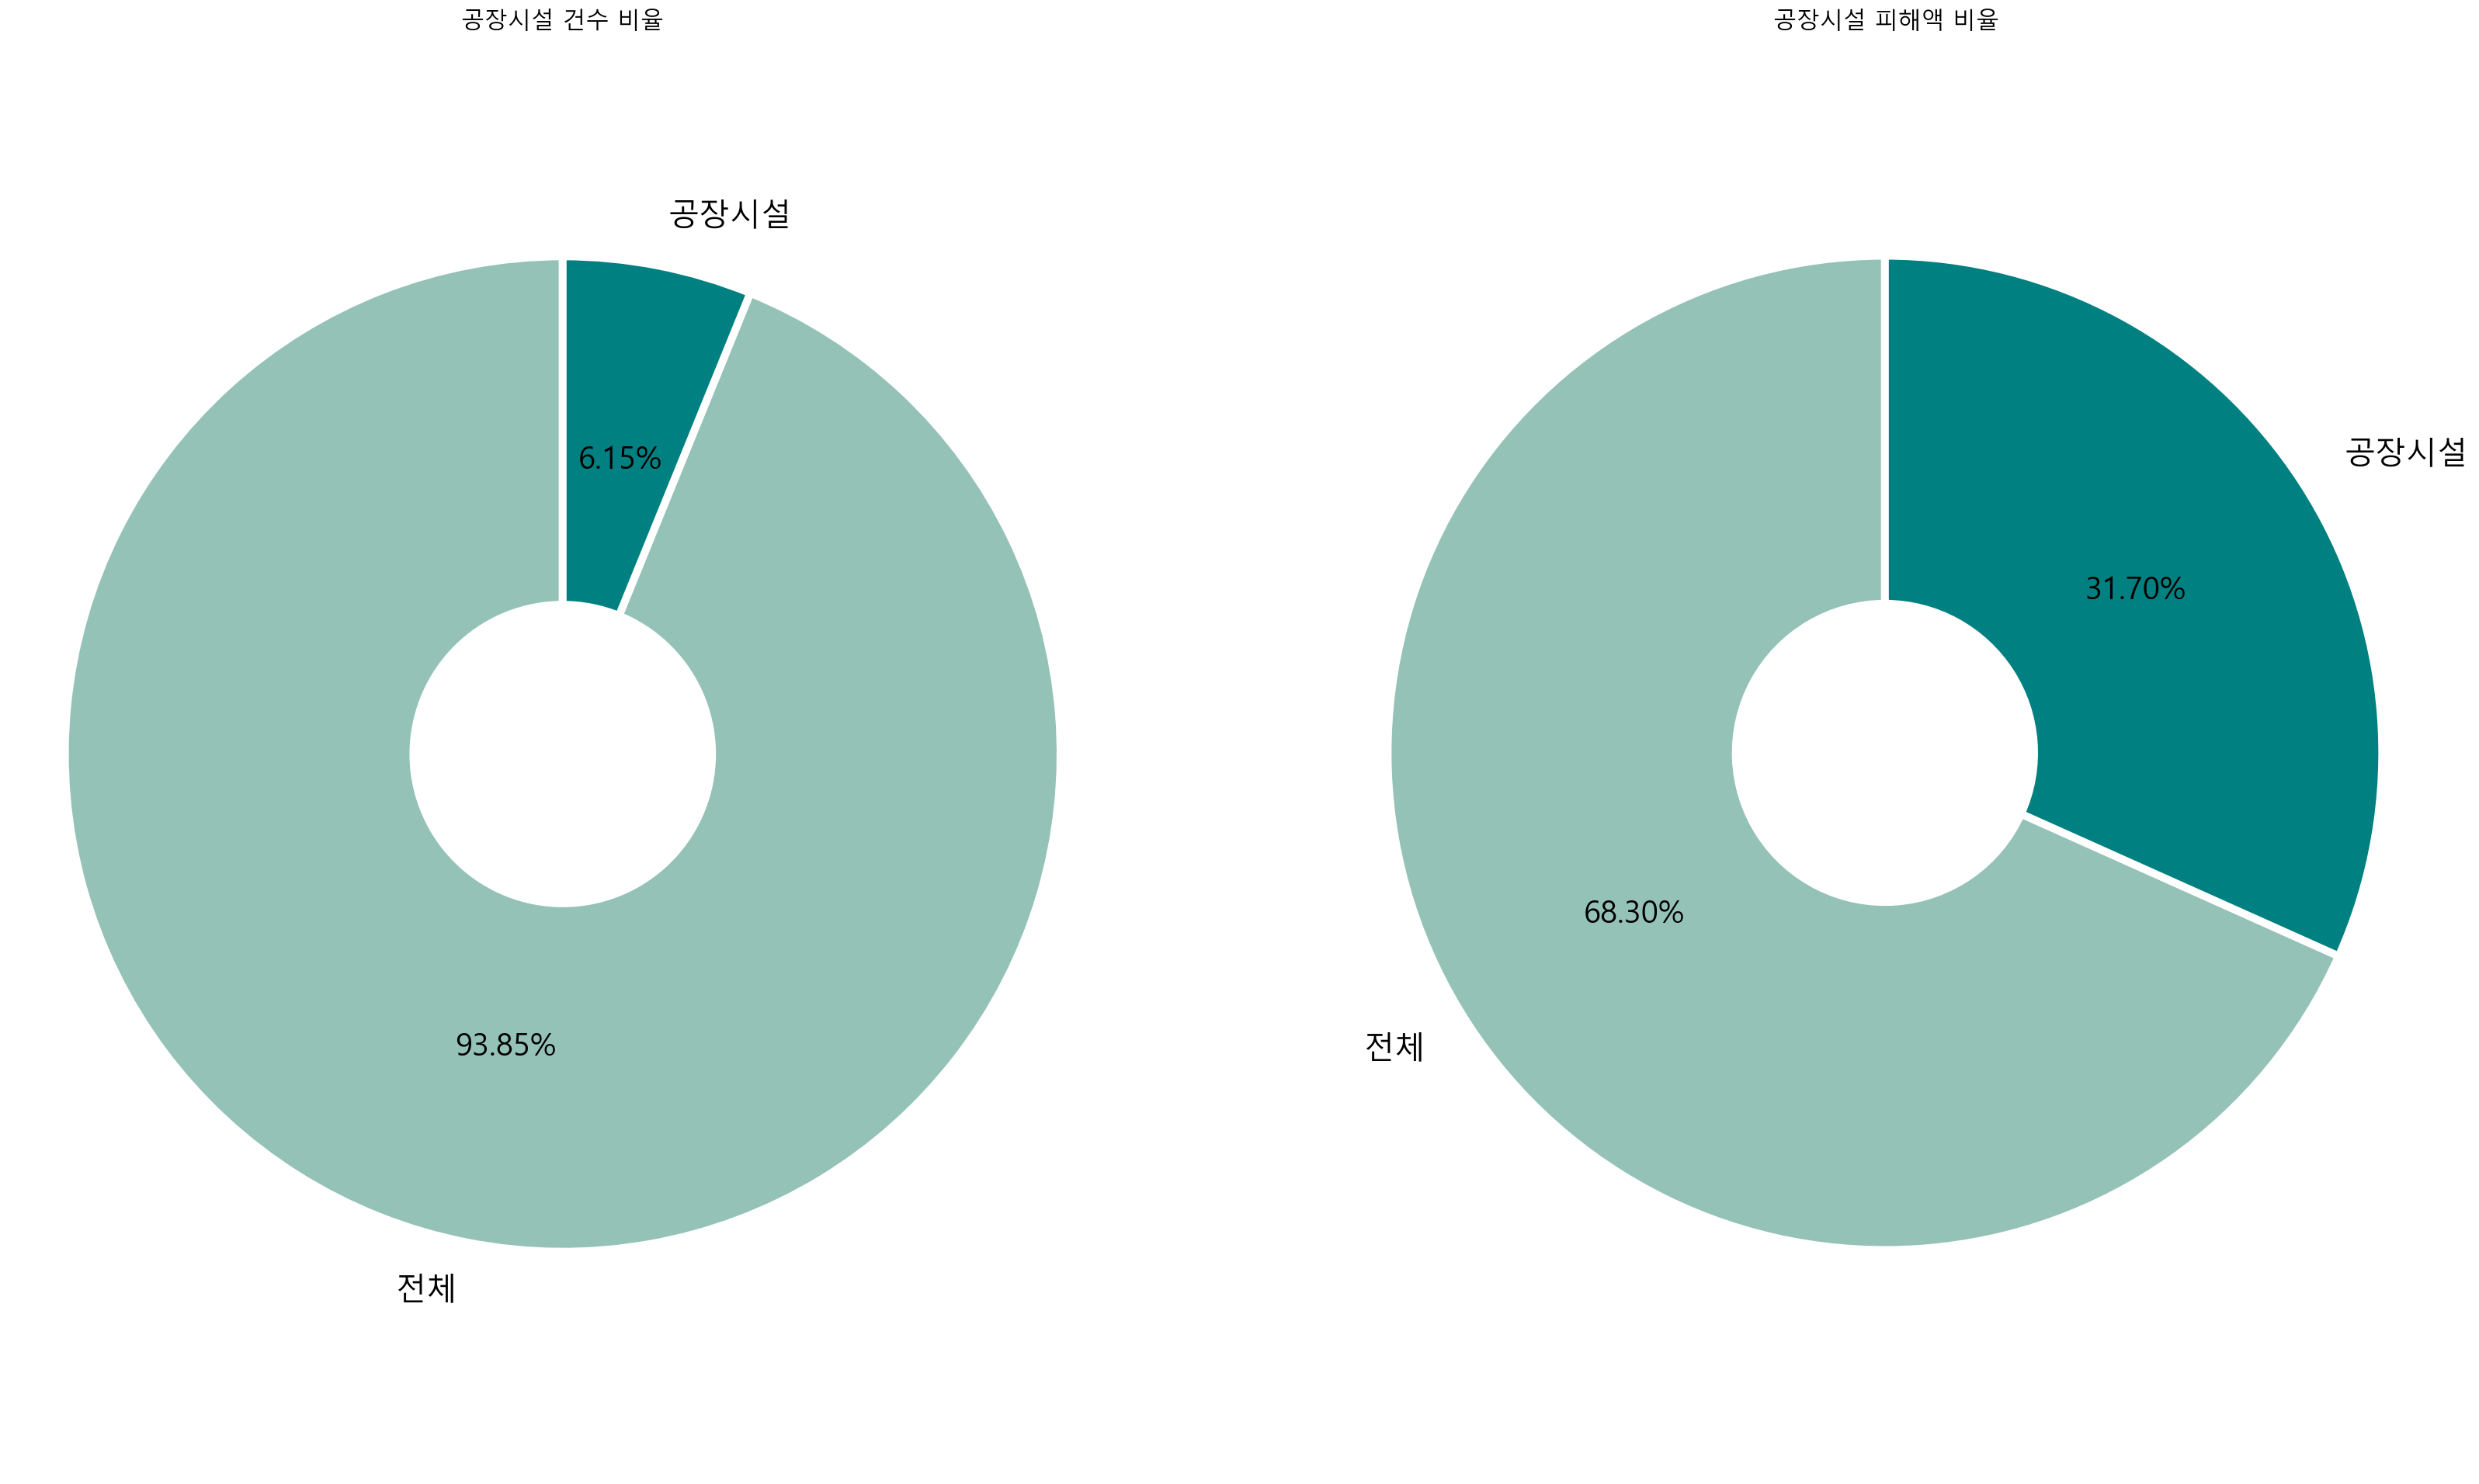

In [13]:
place_percent_code('P03')

In [14]:
def place_district_sum(place):
    place_district_sum = []
    place_district_damage_sum = []
    for i in range(len(district)):
        p = factor[factor.place == place][factor.district == district[i]]
        ps = p['district'].count()
        place_district_sum.append(ps)  # 화재장소 - 구 단위 화재건수
        pps = p['property_damage'].sum()
        place_district_damage_sum.append(pps) # 화재장소 - 구 단위 피해액
        
    pds_fd = pd.DataFrame({
        'district':district,  # 구
        'district_code':district_code, # 구 코드
        'pds':place_district_sum,  # 화재장소 - 구별 화재건수
        'pdds':place_district_damage_sum # 화재장소 - 구별 피해액
    })
    
    pds_fd.to_csv('map/%s_pds_fd.csv'%(place))
    
    fig, ax1 = plt.subplots(figsize=(22,15))
    plt.title('%s의 화재 발생건수 및 재산피해규모'%(place), fontsize=19)
    plt.rc('xtick', labelsize=13)
    plt.rc('font', size=13)
    ax1.plot(district, place_district_sum, color='darkkhaki', markersize=7, linewidth=3, alpha=0.7, label='화재발생건수', marker='o')
    ax1.set_xlabel('구')
    ax1.set_ylabel('화재발생건수')
    for i, v in enumerate(district):
        plt.text(v, place_district_sum[i], str(place_district_sum[i]),
                fontsize=13,
                color='black',
                horizontalalignment='left',
                verticalalignment='bottom')
    ax2 = ax1.twinx()
    ax2.bar(district, place_district_damage_sum, color='#95C2B7', label='재산피해액(천원)', alpha=0.7, width=0.7)
    ax2.set_ylabel('피해액(천원)')
    ax2.set_ylim(0, 1600000)
    for i, v in enumerate(district):
        plt.text(v, place_district_damage_sum[i], str(place_district_damage_sum[i]),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
    
    ax1.set_zorder(ax2.get_zorder() + 10)
    ax1.patch.set_visible(False)
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()
    
    
    print(pds_fd)

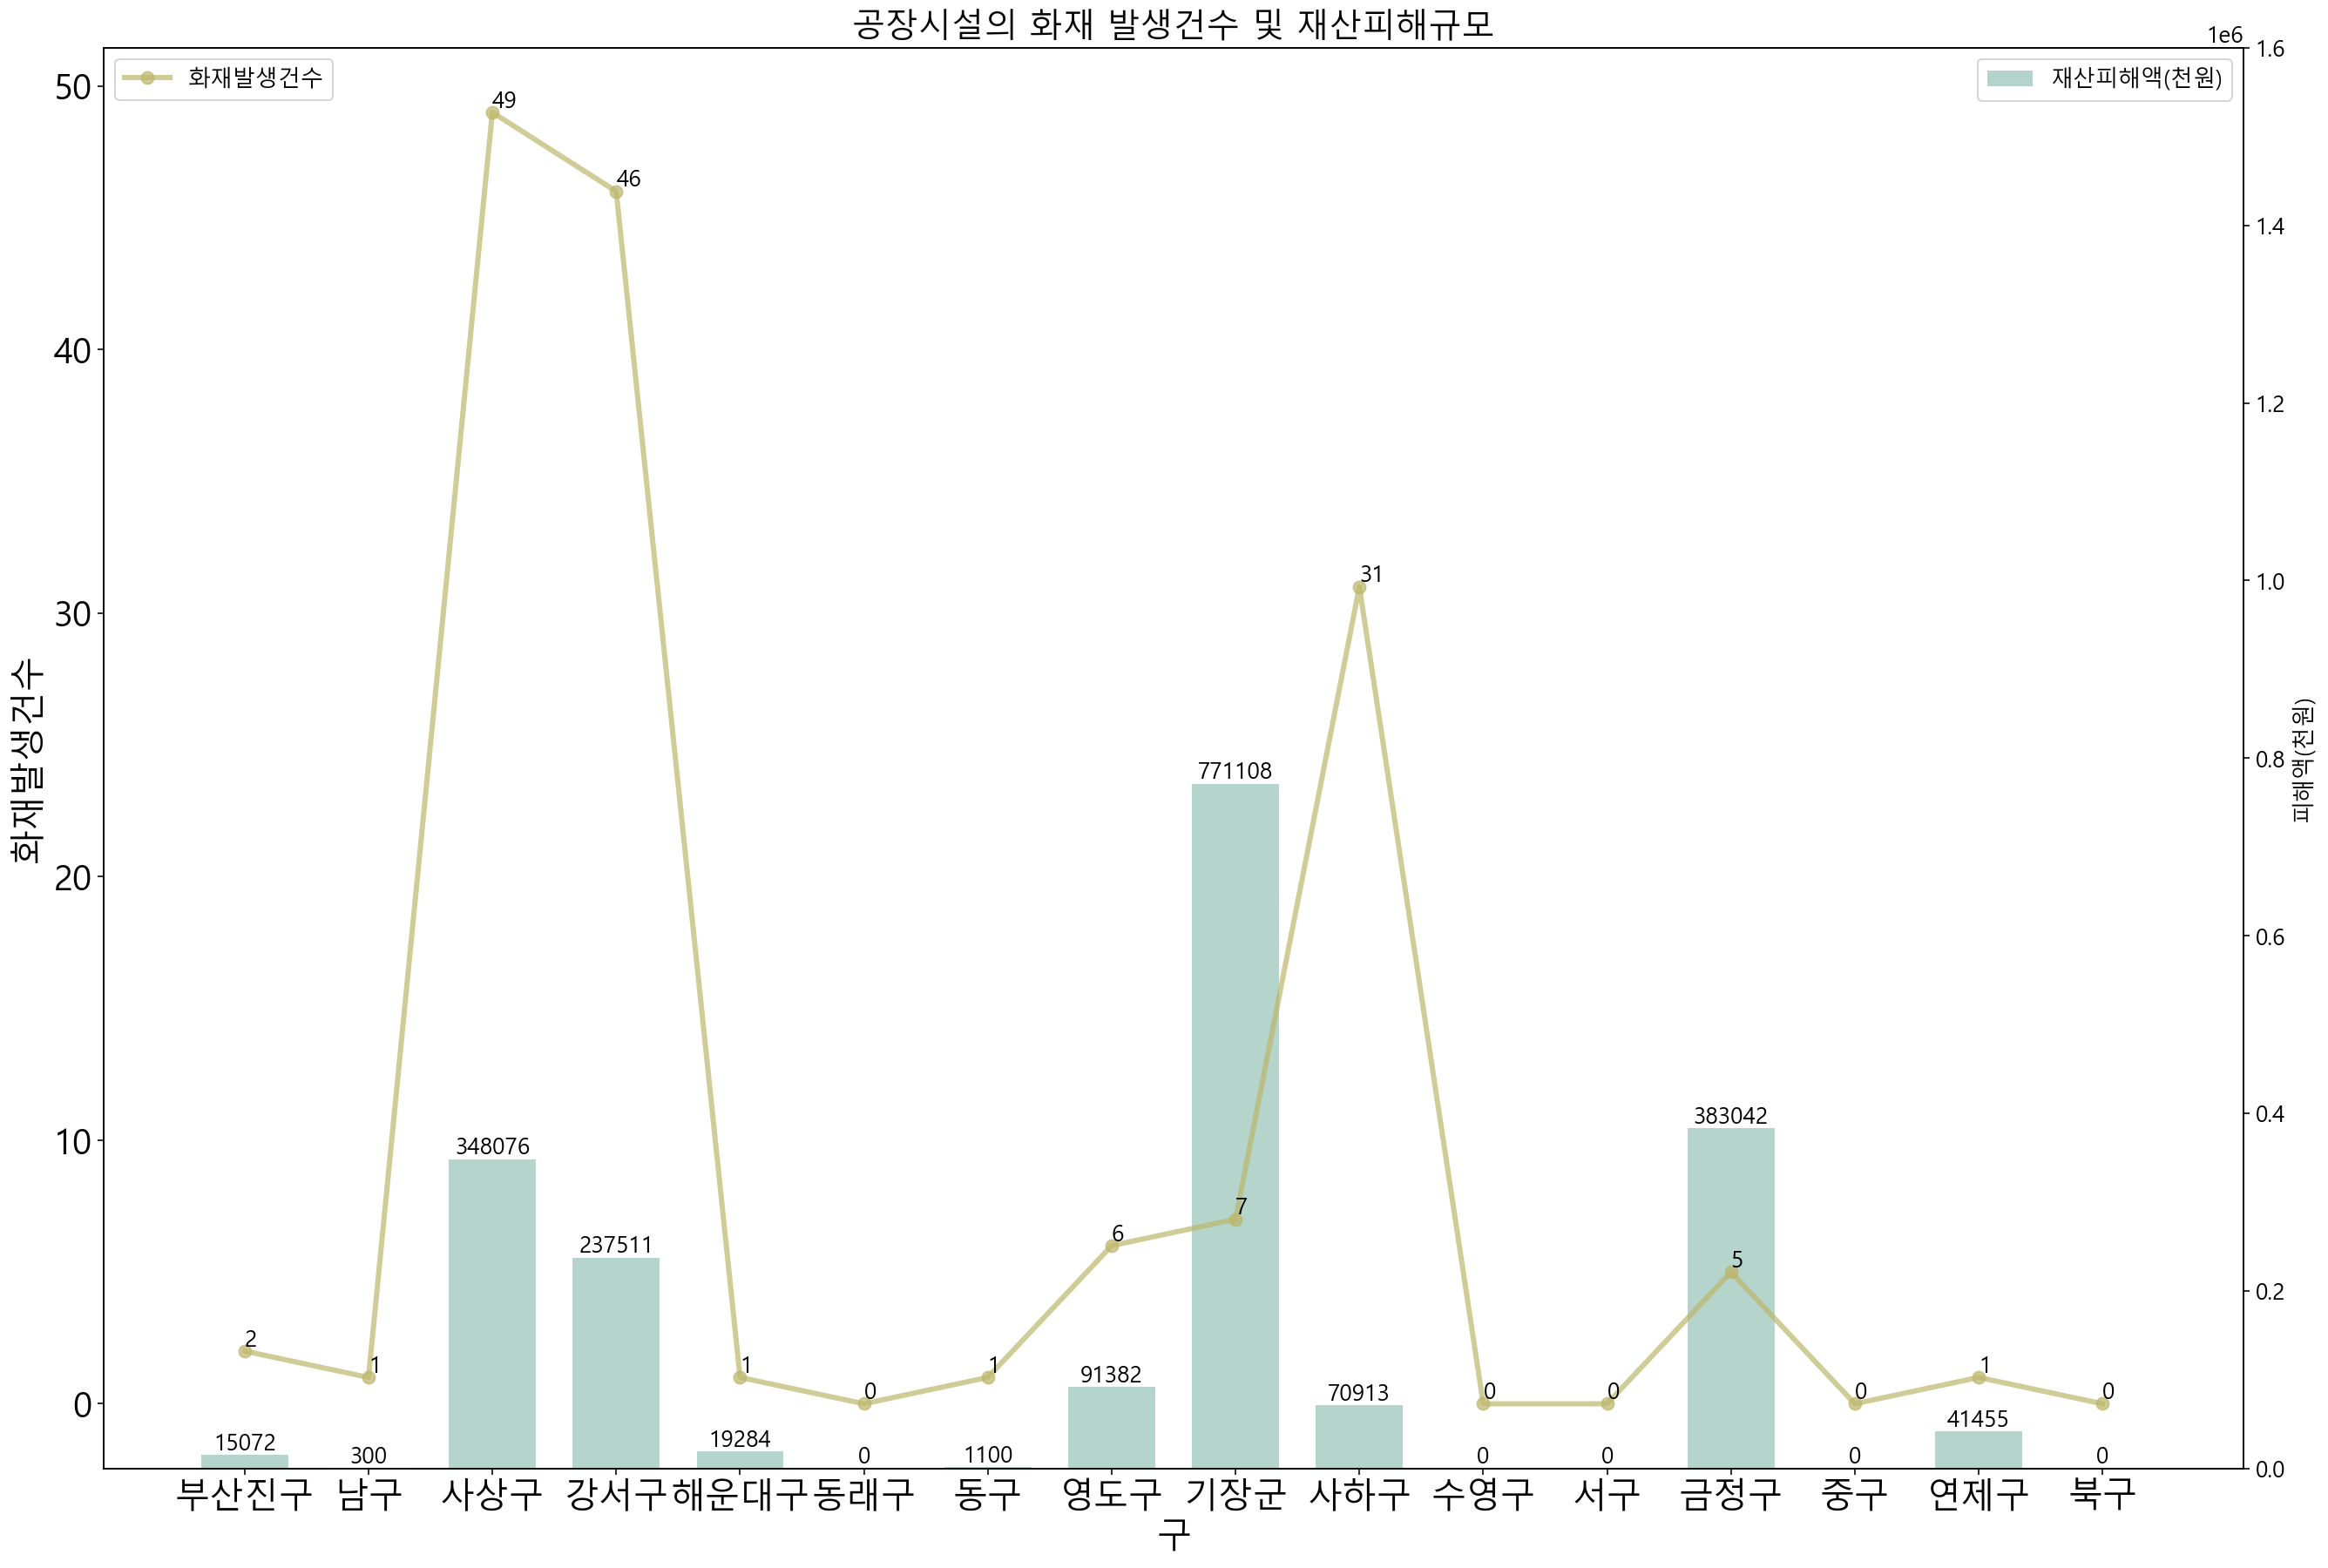

   district district_code  pds    pdds
0      부산진구           D07    2   15072
1        남구           D04    1     300
2       사상구           D09   49  348076
3       강서구           D01   46  237511
4      해운대구           D16    1   19284
5       동래구           D06    0       0
6        동구           D05    1    1100
7       영도구           D14    6   91382
8       기장군           D03    7  771108
9       사하구           D10   31   70913
10      수영구           D12    0       0
11       서구           D11    0       0
12      금정구           D02    5  383042
13       중구           D15    0       0
14      연제구           D13    1   41455
15       북구           D08    0       0


In [15]:
place_district_sum('공장시설')

In [16]:
import folium
import json

In [17]:
geo_path = "./busan_gu.json"
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [18]:
# 지역별 장소 화재건수
def place_district_sum_map(place):
    df = pd.read_csv('map/%s_pds_fd.csv'%(place), index_col=1)
 
    place_district_sum = []
    place_district_damage_sum = []
    for i in range(len(district)):
        p = factor[factor.place == place][factor.district == district[i]]
        ps = p['district'].count()
        place_district_sum.append(ps)
        pps = p['property_damage'].sum()
        place_district_damage_sum.append(pps)
        
    pds_fd = pd.DataFrame({
        'district':district,
        'pds':place_district_sum,
        'pdds':place_district_damage_sum
    })
    map = folium.Map(location = [35.1856505, 129.1], zoom_start=11)
    map.choropleth(geo_data = geo_str,
              data = df['pds'],
              columns = [df.index, df['pds']],
              fill_color = 'PuRd',
              key_on='feature.id')
    map.save('map/%s_district_cnt.html'%(place))

In [21]:
# 지역별 장소 피해규모
def place_district_damage_sum_map(place):
    df = pd.read_csv('map/%s_pds_fd.csv'%(place), index_col=1)
 
    place_district_sum = []
    place_district_damage_sum = []
    for i in range(len(district)):
        p = factor[factor.place == place][factor.district == district[i]]
        ps = p['district'].count()
        place_district_sum.append(ps)
        pps = p['property_damage'].sum()
        place_district_damage_sum.append(pps)
        
    pds_fd = pd.DataFrame({
        'district':district,
        'pds':place_district_sum,
        'pdds':place_district_damage_sum
    })
    map = folium.Map(location = [35.1856505, 129.1], zoom_start=11)
    map.choropleth(geo_data = geo_str,
              data = df['pdds'],
              columns = [df.index, df['pdds']],
              fill_color = 'PuRd',
              key_on='feature.id')
    map.save('map/%s_district_damage.html'%(place))

In [22]:
place_district_sum_map('공장시설')

In [23]:
place_district_damage_sum_map('공장시설')

In [46]:
# 지역별 특정시설 분포 맵 시각화
def place_district_map(place):
    
    place_district_sum = []
    for i in range(len(district)):
        cs = factor[factor.place == place][factor.district == district[i]]
        css = cs['place'].count()
        place_district_sum.append(css)
        
    pds_fd = pd.DataFrame({
        'district':district,
        'pds':place_district_sum
    })
    
    pds_fd.to_csv('map/%s_pds_fd.csv'%(place))
    
    df = pd.read_csv('map/%s_pds_fd.csv'%(place), index_col=1)
    
    map = folium.Map(location = [35.1856505, 129.1], zoom_start=11)
    map.choropleth(geo_data = geo_str,
              data = df['pds'],
              columns = [df.index, df['pds']],
              fill_color = 'PuRd',
              key_on='feature.id',
                  legend_name='%s 분포'%(place))
    map.save('map/%s_district.html'%(place))
    
    print(pds_fd)

In [44]:
def sumexamp(place):
    place_district_sum = []
    for i in range(len(district)):
        cs = factor[factor.place == place][factor.district == district[i]]
        css = cs['place'].count()
        place_district_sum.append(css)
    
    pds_fd = pd.DataFrame({
        'district':district,
        'place':place,
        'pds':place_district_sum
    })
    
    pds_fd.to_csv('map/%s_pds_fd.csv'%(place))
    
    df = pd.read_csv('map/%s_pds_fd.csv'%(place), index_col=1)
    
    map = folium.Map(location = [35.1856505, 129.1], zoom_start=11)
    map.choropleth(geo_data = geo_str,
              data = df['pds'],
              columns = [df.index, df['pds']],
              fill_color = 'PuRd',
              key_on='feature.id',
                  legend_name='%s 분포'%(place))
    map.save('map/%s_district.html'%(place))
    
    print(place_district_sum, pds_fd)

In [45]:
sumexamp('공장시설')

[2, 1, 49, 46, 1, 0, 1, 6, 7, 31, 0, 0, 5, 0, 1, 0]    district place  pds
0      부산진구  공장시설    2
1        남구  공장시설    1
2       사상구  공장시설   49
3       강서구  공장시설   46
4      해운대구  공장시설    1
5       동래구  공장시설    0
6        동구  공장시설    1
7       영도구  공장시설    6
8       기장군  공장시설    7
9       사하구  공장시설   31
10      수영구  공장시설    0
11       서구  공장시설    0
12      금정구  공장시설    5
13       중구  공장시설    0
14      연제구  공장시설    1
15       북구  공장시설    0


In [33]:
place_district_map('공장시설')

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''